In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist 

In [2]:
univ = pd.read_csv('F:\\PROGRAMMING\\Python\ML\\Unsupervise ML\\University Clustering.csv')

In [3]:
univ['Expenses'] = univ['Expenses'].str.replace(',','')
univ.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [4]:
univ.isnull().sum()

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [5]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
Univ        25 non-null object
State       25 non-null object
SAT         25 non-null int64
Top10       25 non-null int64
Accept      25 non-null int64
SFRatio     25 non-null int64
Expenses    25 non-null object
GradRate    25 non-null int64
dtypes: int64(5), object(3)
memory usage: 1.7+ KB


In [6]:
del univ['Univ']
del univ['State']
univ.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [7]:
names = univ.columns
names

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [8]:
from sklearn import preprocessing
Scaler = preprocessing.StandardScaler()
sd=Scaler.fit_transform(univ)

In [9]:
sd = pd.DataFrame(sd, columns=names)
sd.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [10]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(univ)
pca_values

array([[-4.68363650e+03, -7.59712203e+01, -5.80091946e+00,
         1.66550808e+00],
       [ 3.61872552e+04,  6.56606028e+01,  3.11485493e+00,
         6.76079124e+00],
       [-2.36202549e+03,  2.57815022e-01,  2.27858526e+01,
        -1.33903101e+01],
       [ 4.12219319e+03, -2.02621630e+01, -6.88636656e+00,
        -7.69002511e+00],
       [-5.52381143e+03, -4.85379725e+01, -6.94342469e-01,
         1.56816189e+00],
       [ 4.77437077e+03, -4.84687896e+01, -3.55572840e+00,
        -1.00467582e+00],
       [ 4.19722979e+03, -2.67600466e+01, -2.43822730e+00,
         4.91744852e+00],
       [-7.26192660e+03, -3.52275203e+01, -1.43204663e+01,
        -3.42233832e+00],
       [ 1.21375996e+04, -6.44741319e+01, -3.15624961e+00,
        -7.90531419e+00],
       [ 3.13026647e+04,  1.49963047e+02, -3.79522155e+00,
         1.95178848e+00],
       [ 7.48255440e+03, -6.98072577e+01,  1.16758889e+01,
        -2.51956937e+00],
       [ 6.63958605e+02,  8.13748385e+00, -2.49154800e+00,
      

In [11]:
var = pca.explained_variance_ratio_
var

array([9.99975027e-01, 2.43012564e-05, 3.33798878e-07, 2.11914679e-07])

In [13]:
pca = pd.DataFrame(data = pca_values,columns = ['principal component 1','principal component 2',
                                                        'principal component 3'])
pca

,principal component 1,principal component 2,principal component 3,principal component 4
0,-4683.636503,-75.971220,-5.800919,1.665508
1,36187.255229,65.660603,3.114855,6.760791
2,-2362.025493,0.257815,22.785853,-13.390310
3,4122.193187,-20.262163,-6.886367,-7.690025
4,-5523.811429,-48.537972,-0.694342,1.568162
5,4774.370772,-48.468790,-3.555728,-1.004676
6,4197.229791,-26.760047,-2.438227,4.917449
7,-7261.926598,-35.227520,-14.320466,-3.422338
8,12137.599555,-64.474132,-3.156250,-7.905314
9,31302.664668,149.963047,-3.795222,1.951788


Text(0, 0.5, 'Second principle component')

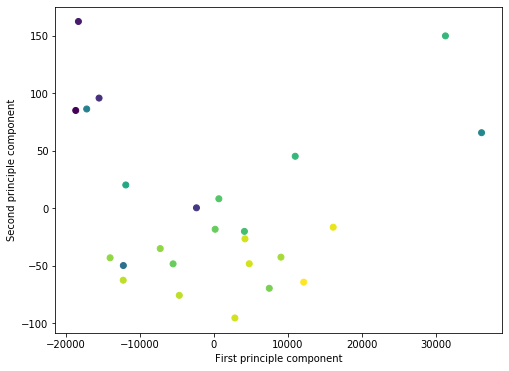

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(pca_values[:,0],pca_values[:,1],c=univ['GradRate'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')